### 141180057 - Yunus Emre PEKGÜÇ
### Accurate occupancy detection of an office room from light,temperature, humidity and CO2 measurements using statistical learning models

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report, confusion_matrix

In [277]:
#Read data
data_train = pd.read_csv("datatraining.txt")
data_test_1 = pd.read_csv("datatest.txt")
data_test_2  = pd.read_csv("datatest2.txt")

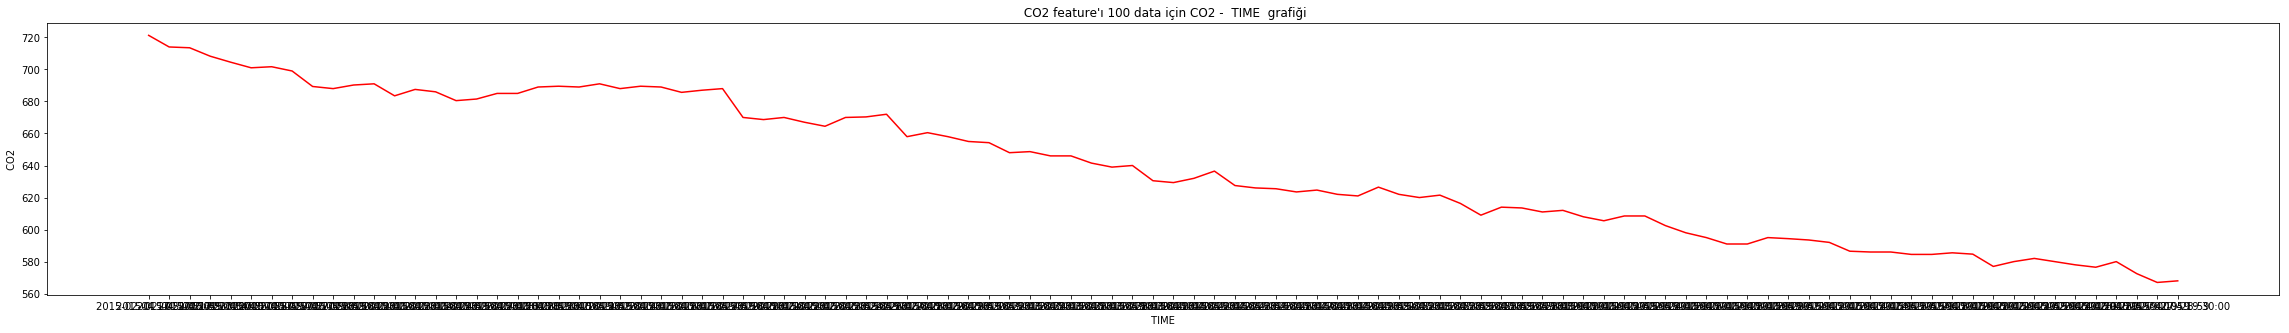

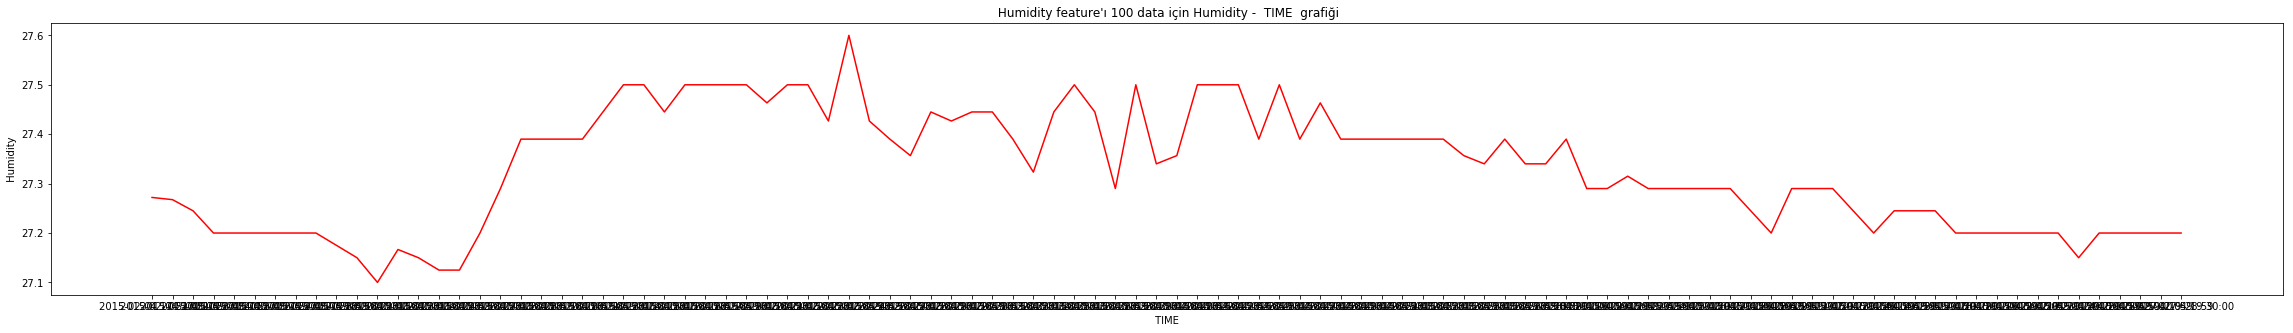

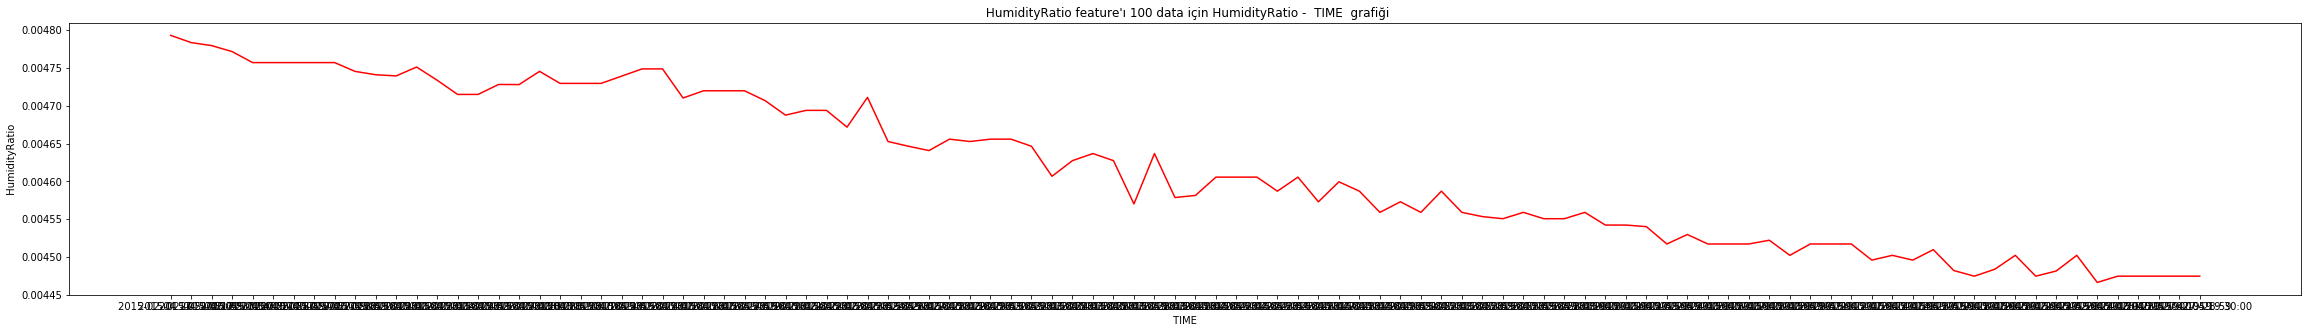

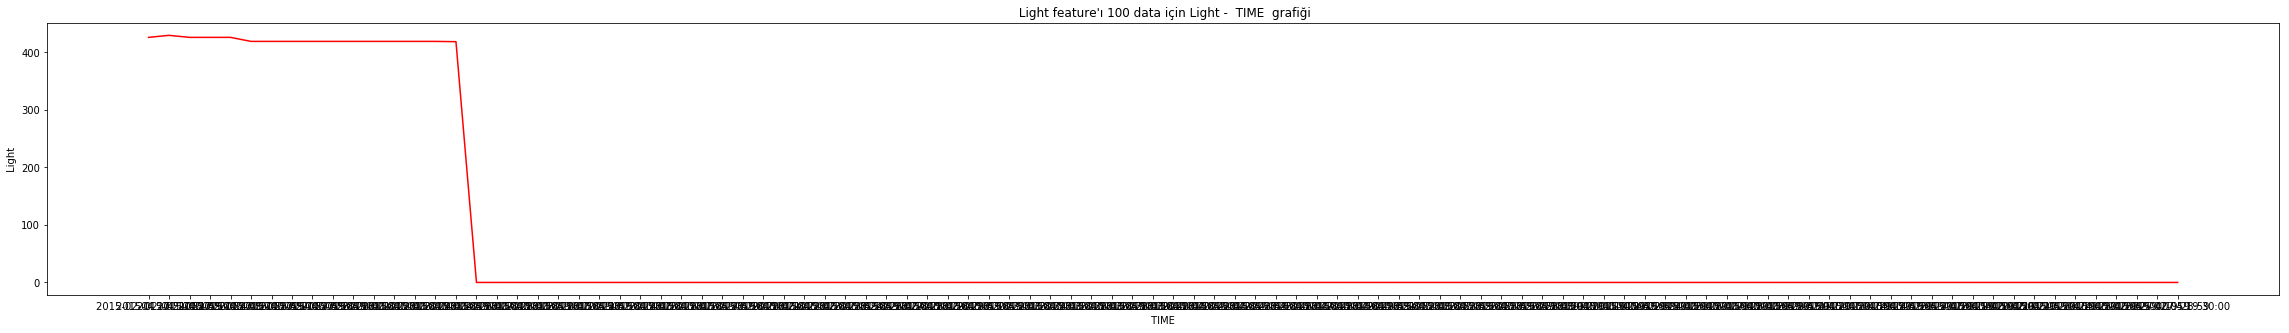

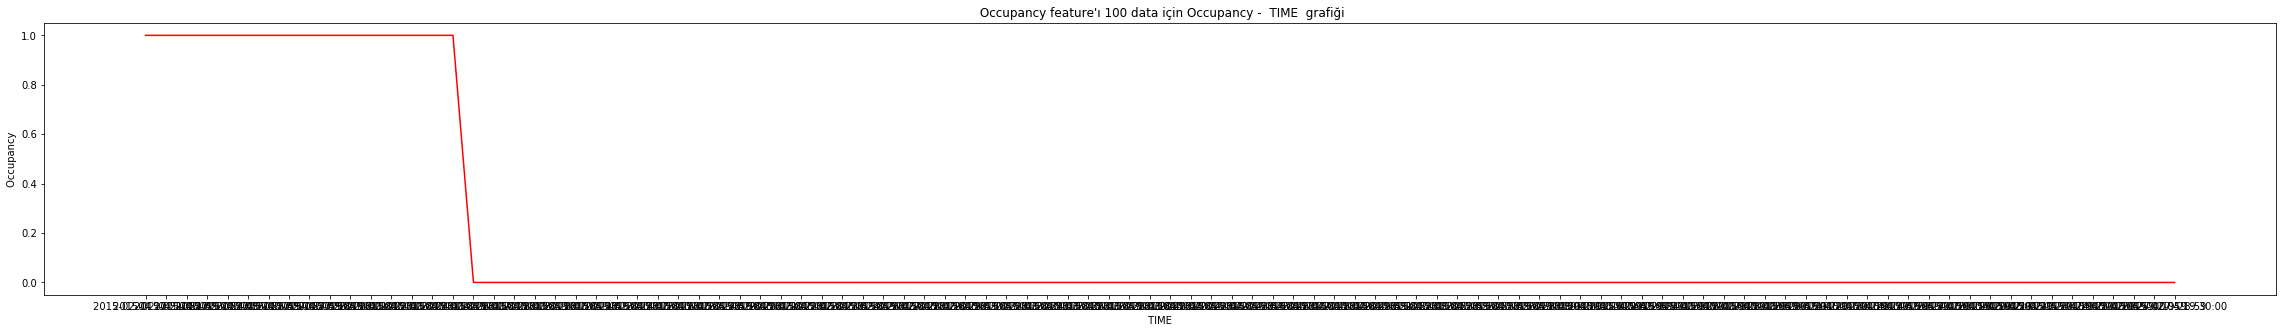

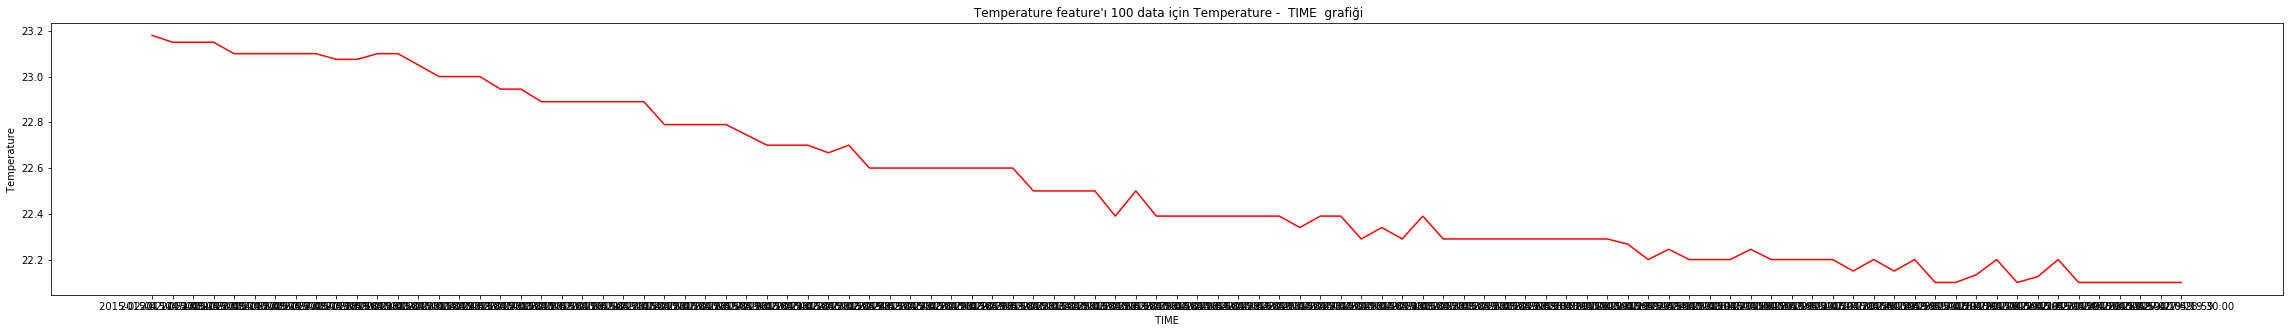

In [278]:
#Datamızın ilk 100 verisi için data - feature durumu



def ShowbyDate(feature,day = 100):        
    date = data_train.date.iloc[:day]
    feature = feature.iloc[:day]
    plt.figure(figsize=(40,5))
    plt.plot(date,feature,color="red")
    plt.xlabel(" TIME ")
    plt.ylabel(" {} ".format(feature.name))
    plt.title(" {} feature'ı {} data için {} - {} grafiği".format(feature.name,day,feature.name," TIME "))
    plt.show()

    

ShowbyDate(data_train.CO2)
ShowbyDate(data_train.Humidity)
ShowbyDate(data_train.HumidityRatio)
ShowbyDate(data_train.Light)
ShowbyDate(data_train.Occupancy)
ShowbyDate(data_train.Temperature)

In [279]:
#Drop Function

def Drop(data,column_name):
    data.drop(column_name,axis=1,inplace=True)
    
#Date column baştan drop
Drop(data_train,"date")  #train data
Drop(data_test_1,"date") #test data 1
Drop(data_test_2,"date") #test data 2

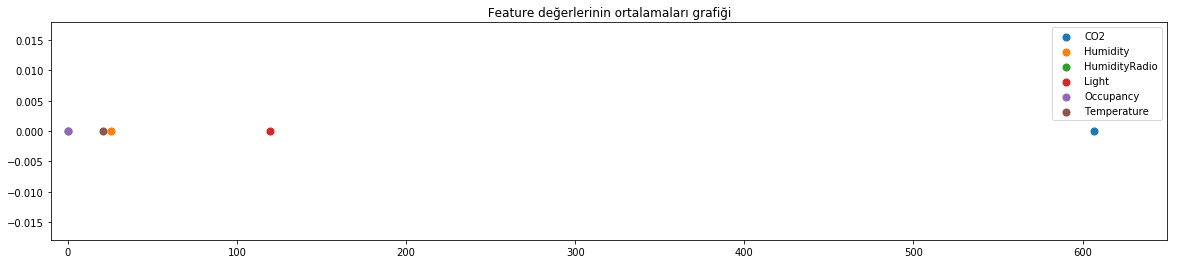

In [280]:
#Feature ortalama değerler

def findAverage(feature):
    return np.average(feature)

variables = []
variables.append(findAverage(data_train.CO2))
variables.append(findAverage(data_train.Humidity))
variables.append(findAverage(data_train.HumidityRatio))
variables.append(findAverage(data_train.Light))
variables.append(findAverage(data_train.Occupancy))
variables.append(findAverage(data_train.Temperature))

names = ["CO2","Humidity","HumidityRadio","Light","Occupancy","Temperature"]
i = 0
plt.figure(figsize=(20,4))
plt.xlim([-10, 650])
plt.title(" Feature değerlerinin ortalamaları grafiği ")
for each in variables:
    plt.scatter(each,0,s=50,label=names[i])
    i = i + 1
plt.legend()
plt.show()

In [281]:
#Feature Seperate Function

def feature_sep(data):
    X = data.drop("Occupancy",axis=1)
    Y = data.Occupancy.values
    return X,Y

#Seperate

x_train, y_train = feature_sep(data_train)
x_test_1, y_test_1 = feature_sep(data_test_1)
x_test_2, y_test_2 = feature_sep(data_test_2)

In [282]:
#Shape
def ShowShape(args,data):
    return print(args,data.shape)

ShowShape("Train data   X shape  : ",x_train)
ShowShape("Train data   Y shape  : ",y_train.reshape(-1,1))
ShowShape("Test  data 1 X shape  : ",x_test_1)
ShowShape("Test  data 1 Y shape  : ",y_test_1.reshape(-1,1))
ShowShape("Test  data 2 X shape  : ",x_test_2)
ShowShape("Test  data 2 Y shape  : ",y_test_2.reshape(-1,1))

Train data   X shape  :  (8143, 5)
Train data   Y shape  :  (8143, 1)
Test  data 1 X shape  :  (2665, 5)
Test  data 1 Y shape  :  (2665, 1)
Test  data 2 X shape  :  (9752, 5)
Test  data 2 Y shape  :  (9752, 1)


In [283]:
#Feature Engineering

x_train['sin(CO2*Light)'] = (np.sin(x_train.CO2*x_train.Light))
x_test_1['sin(CO2*Light)'] = (np.sin(x_test_1.CO2*x_test_1.Light))
x_test_2['sin(CO2*Light)'] = (np.sin(x_test_2.CO2*x_test_2.Light))

x_train['cos(Temperature*Humidity)'] = (np.cos(x_train.Temperature*x_train.Humidity))
x_test_1['cos(Temperature*Humidity)'] = (np.cos(x_test_1.Temperature*x_test_1.Humidity))
x_test_2['cos(Temperature*Humidity)'] = (np.cos(x_test_2.Temperature*x_test_2.Humidity))

data_train['sin(CO2*Light)'] = (np.sin(x_train.CO2*x_train.Light))
data_test_1['sin(CO2*Light)'] = (np.sin(x_test_1.CO2*x_test_1.Light))
data_test_2['sin(CO2*Light)'] = (np.sin(x_test_2.CO2*x_test_2.Light))

data_train['cos(Temperature*Humidity)'] = (np.cos(x_train.Temperature*x_train.Humidity))
data_test_1['cos(Temperature*Humidity)'] = (np.cos(x_test_1.Temperature*x_test_1.Humidity))
data_test_2['cos(Temperature*Humidity)'] = (np.cos(x_test_2.Temperature*x_test_2.Humidity))

x_train.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,sin(CO2*Light),cos(Temperature*Humidity)
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,-0.022336,-0.044243
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.006974,0.011270
Light,0.649942,0.037828,1.000000,0.664022,0.230420,-0.028752,-0.017972
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,-0.016988,-0.027192
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.000446,-0.002644
sin(CO2*Light),-0.022336,0.006974,-0.028752,-0.016988,0.000446,1.000000,0.002029
cos(Temperature*Humidity),-0.044243,0.011270,-0.017972,-0.027192,-0.002644,0.002029,1.000000


In [284]:
x_train

,Temperature,Humidity,Light,CO2,HumidityRatio,sin(CO2*Light),cos(Temperature*Humidity)
1,23.180000,27.272000,426.0,721.250000,0.004793,-0.999660,-0.761717
2,23.150000,27.267500,429.5,714.000000,0.004783,-0.412583,-0.976440
3,23.150000,27.245000,426.0,713.500000,0.004779,0.942765,-0.739564
4,23.150000,27.200000,426.0,708.250000,0.004772,0.793694,0.207802
5,23.100000,27.200000,426.0,704.500000,0.004757,0.608209,0.999999
6,23.100000,27.200000,419.0,701.000000,0.004757,-0.874088,0.999999
7,23.100000,27.200000,419.0,701.666667,0.004757,0.971616,0.999999
8,23.100000,27.200000,419.0,699.000000,0.004757,0.255453,0.999999
9,23.100000,27.200000,419.0,689.333333,0.004757,-0.881353,0.999999
10,23.075000,27.175000,419.0,688.000000,0.004745,-0.515759,0.310188


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


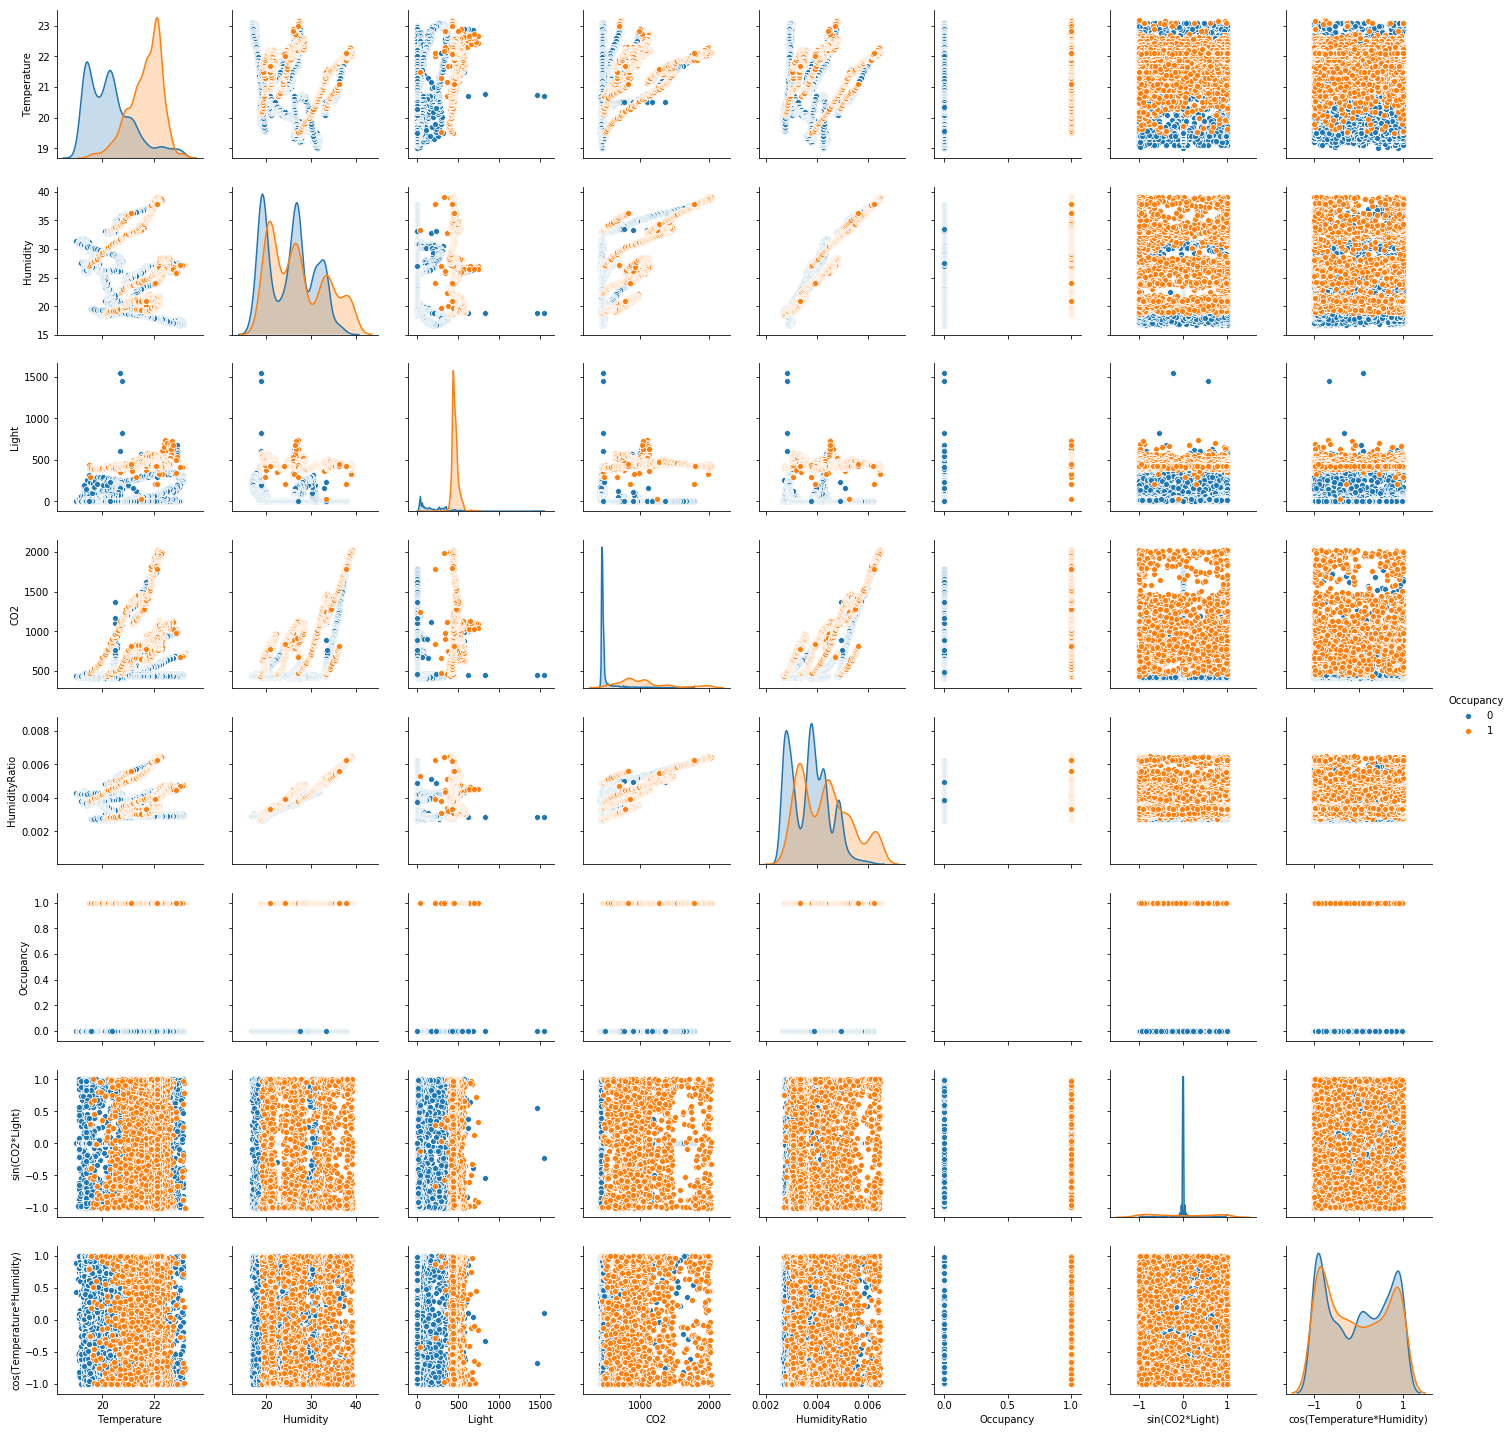

In [285]:
# Plot all - feature/feature on test data features

sns.pairplot(data_train,hue="Occupancy")

PCA ile oluşturulan 2 boyutlu yeni feature doğruluk oranı : % 99.98361389281521
PCA, 7 boyutlu dataseti 2 boyutlu datasete indirgedi ve Occupancy'e göre 3D grafiği : 


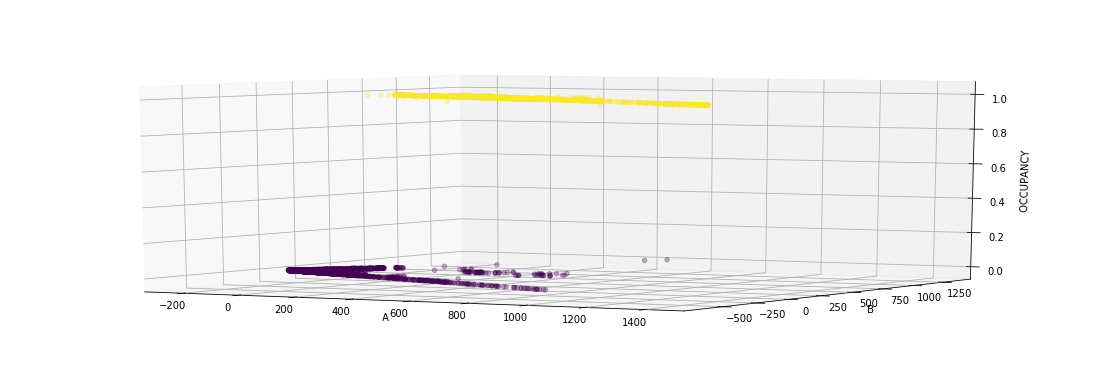

In [286]:
#Feature dimention reduction

pca = PCA(n_components=2) #iki boyuta indirgeme
principalComponents = pca.fit_transform(x_train) #x_train dataseti 5 boyutlu.
principalDf = pd.DataFrame(data = principalComponents, columns = ['a','b'])

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig, elev=7)

x = principalDf.a
y = principalDf.b

ax.set_xlabel(" A ")
ax.set_ylabel(" B ")
ax.set_zlabel(" OCCUPANCY ")

print("PCA ile oluşturulan 2 boyutlu yeni feature doğruluk oranı : %",np.sum(pca.explained_variance_ratio_*100))
print("PCA, 7 boyutlu dataseti 2 boyutlu datasete indirgedi ve Occupancy'e göre 3D grafiği : ")
ax.scatter(x, y, y_train,c=y_train,alpha=0.3)


PCA sonrası 7 boyutlu datanın 1 boyuta indirgenmiş halinin data doğruluğu %87.1217763605679
Bir boyutlu indirgenmiş datanın occupancy'e göre 2D grafiği : 


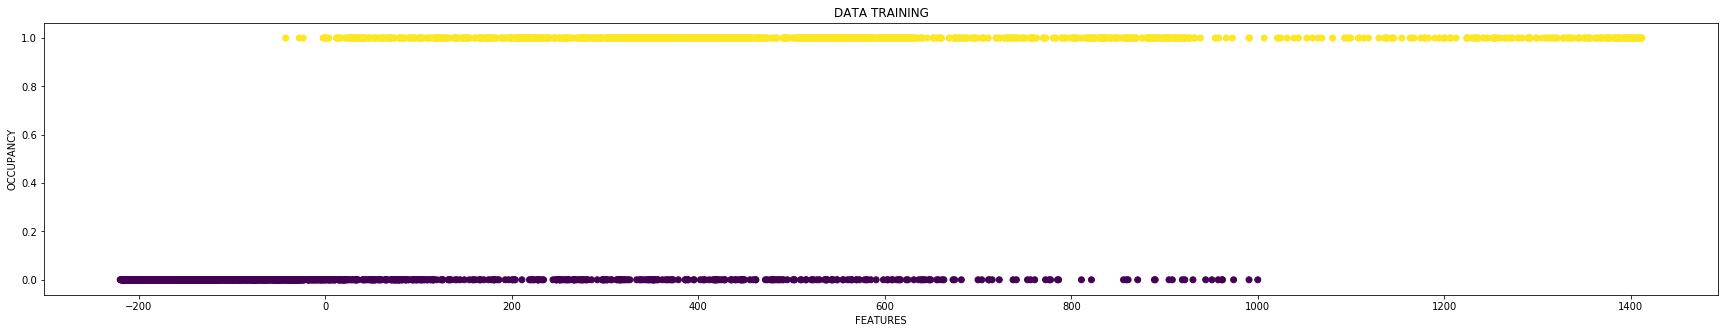

In [287]:
#Dimension Reduction

pca = PCA(n_components=1) #tek boyuta indirgeme
principalComponents = pca.fit_transform(x_train) #x_train dataseti 5 boyutlu.
principalDf = pd.DataFrame(data = principalComponents, columns = ['a'])
print("PCA sonrası 7 boyutlu datanın 1 boyuta indirgenmiş halinin data doğruluğu %{}".format(np.sum(pca.explained_variance_ratio_*100)))
print("Bir boyutlu indirgenmiş datanın occupancy'e göre 2D grafiği : ")

plt.figure(figsize=(30,5))
plt.scatter(principalDf,y_train,c=y_train,alpha=1)
plt.title("DATA TRAINING")
plt.xlabel("FEATURES")
plt.ylabel("OCCUPANCY")
plt.show()


In [288]:
# Featurelar arası koralasyon

x_train.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,sin(CO2*Light),cos(Temperature*Humidity)
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,-0.022336,-0.044243
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.006974,0.011270
Light,0.649942,0.037828,1.000000,0.664022,0.230420,-0.028752,-0.017972
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,-0.016988,-0.027192
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.000446,-0.002644
sin(CO2*Light),-0.022336,0.006974,-0.028752,-0.016988,0.000446,1.000000,0.002029
cos(Temperature*Humidity),-0.044243,0.011270,-0.017972,-0.027192,-0.002644,0.002029,1.000000


In [289]:
#KORALASYON KONTROLÜ

#Humidity ve Humidity Ratio koralasyon fazla -> Humidity daha iyi score veriyor. HumidityRatio Drop

Drop(x_train,"HumidityRatio")
Drop(x_test_1,"HumidityRatio")
Drop(x_test_2,"HumidityRatio")

print("INFO : HumidityRadio Dropped")

x_train.corr()

INFO : HumidityRadio Dropped


,Temperature,Humidity,Light,CO2,sin(CO2*Light),cos(Temperature*Humidity)
Temperature,1.000000,-0.141759,0.649942,0.559894,-0.022336,-0.044243
Humidity,-0.141759,1.000000,0.037828,0.439023,0.006974,0.011270
Light,0.649942,0.037828,1.000000,0.664022,-0.028752,-0.017972
CO2,0.559894,0.439023,0.664022,1.000000,-0.016988,-0.027192
sin(CO2*Light),-0.022336,0.006974,-0.028752,-0.016988,1.000000,0.002029
cos(Temperature*Humidity),-0.044243,0.011270,-0.017972,-0.027192,0.002029,1.000000


## SCALING İŞLEMLERİ

In [290]:
#preprocessing

from sklearn import preprocessing

x_train_preprocessing  = preprocessing.normalize(x_train, norm='l2')  #level2 normalized
x_test_1_preprocessing = preprocessing.normalize(x_test_1, norm='l2') #level2 test normalized
x_test_2_preprocessing = preprocessing.normalize(x_test_2,norm='l2')  #level2 test2 normalized

In [291]:
#Normalization Function - max-min scaling

def Normalization(feature):
    feature_normal = (feature - np.min(feature))/(np.max(feature)-np.min(feature)).values
    return feature_normal

#Normalization
x_train_normal  = Normalization(x_train)
x_test_1_normal = Normalization(x_test_1)
x_test_2_normal = Normalization(x_test_2)


In [292]:
#Standartlaştırma z_score

from scipy import stats

x_train_zscore = stats.zscore(x_train)
x_test_1_zscore = stats.zscore(x_test_1)
x_test_2_zscore = stats.zscore(x_test_2)




#                                 --- TRAINING & TESTING --- 



Logistic Regression, Preprocessed , Train Data Score  : 0.9864914650620165
Logistic Regression, Preprocessed , Test Data 1 Score : 0.976360225140713
Logistic Regression, Preprocessed , Test Data 2 Score : 0.9629819524200164

Logistic Regression, Min-Max Scaled , Train Data Score  : 0.9860002456097261
Logistic Regression, Min-Max Scaled , Test Data 1 Score : 0.9786116322701689
Logistic Regression, Min-Max Scaled , Test Data 2 Score : 0.9892329778506973

Logistic Regression, Z-Score Scaled , Train Data Score  : 0.9860002456097261
Logistic Regression, Z-Score Scaled , Test Data 1 Score : 0.8855534709193246
Logistic Regression, Z-Score Scaled , Test Data 2 Score : 0.9578547990155866



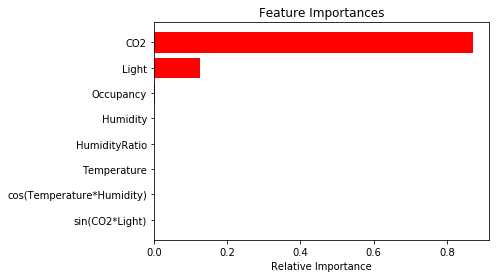

In [293]:
#LogisticRegression Train 

from sklearn.linear_model import LogisticRegression

#preprocessing
LR1 = LogisticRegression(random_state=0,C=100)
LR1.fit(x_train_preprocessing,y_train)

#normalize
LR2 = LogisticRegression(random_state=0,C=100)
LR2.fit(x_train_normal,y_train)

#z_score
LR3 = LogisticRegression(random_state=0,C=100)
LR3.fit(x_train_zscore,y_train)

#Logistic Regression Test 

#preprocessing
print("Logistic Regression, Preprocessed , Train Data Score  : {}".format(LR1.score(x_train_preprocessing,y_train)))
print("Logistic Regression, Preprocessed , Test Data 1 Score : {}".format(LR1.score(x_test_1_preprocessing,y_test_1)))
print("Logistic Regression, Preprocessed , Test Data 2 Score : {}".format(LR1.score(x_test_2_preprocessing,y_test_2)))
print("")
#min-max scaled
print("Logistic Regression, Min-Max Scaled , Train Data Score  : {}".format(LR2.score(x_train_normal,y_train)))
print("Logistic Regression, Min-Max Scaled , Test Data 1 Score : {}".format(LR2.score(x_test_1_normal,y_test_1)))
print("Logistic Regression, Min-Max Scaled , Test Data 2 Score : {}".format(LR2.score(x_test_2_normal,y_test_2)))
print("")
#z-score
print("Logistic Regression, Z-Score Scaled , Train Data Score  : {}".format(LR3.score(x_train_zscore,y_train)))
print("Logistic Regression, Z-Score Scaled , Test Data 1 Score : {}".format(LR3.score(x_test_1_zscore,y_test_1)))
print("Logistic Regression, Z-Score Scaled , Test Data 2 Score : {}".format(LR3.score(x_test_2_zscore,y_test_2)))
print("")



from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42,max_depth=10)
random_forest_model.fit(data_train,x_train)

features= data_train.columns
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [294]:
#Naive Bayes Train

from sklearn.naive_bayes import GaussianNB

#preprocessing
NB1 = GaussianNB()
NB1.fit(x_train_preprocessing,y_train)
#min-max scaled
NB2 = GaussianNB()
NB2.fit(x_train_normal,y_train)
#z-score
NB3 = GaussianNB()
NB3.fit(x_train_zscore,y_train)


#Naive Bayes Test


#preprocessing
print("Naive Bayes, Preprocessed , Train Data Score  : {}".format(NB1.score(x_train_preprocessing,y_train)))
print("Naive Bayes, Preprocessed , Test Data 1 Score : {}".format(NB1.score(x_test_1_preprocessing,y_test_1)))
print("Naive Bayes, Preprocessed , Test Data 2 Score : {}".format(NB1.score(x_test_2_preprocessing,y_test_2)))
print("")
#min-max scaled
print("Naive Bayes, Min-Max Scaled , Train Data Score  : {}".format(NB2.score(x_train_normal,y_train)))
print("Naive Bayes, Min-Max Scaled , Test Data 1 Score : {}".format(NB2.score(x_test_1_normal,y_test_1)))
print("Naive Bayes, Min-Max Scaled , Test Data 2 Score : {}".format(NB2.score(x_test_2_normal,y_test_2)))
print("")
#z-score
print("Naive Bayes, Z-Score Scaled , Train Data Score  : {}".format(NB3.score(x_train_zscore,y_train)))
print("Naive Bayes, Z-Score Scaled , Test Data 1 Score : {}".format(NB3.score(x_test_1_zscore,y_test_1)))
print("Naive Bayes, Z-Score Scaled , Test Data 2 Score : {}".format(NB3.score(x_test_2_zscore,y_test_2)))
print("")


y_test1_pred = NB2.predict(x_test_1_normal)
y_test2_pred = NB2.predict(x_test_2_normal)

print(" FOR MIN MAX SCALING ")
print(" -- -- -- -- -- -- -- -- -- ")
print(" CONFUSION MATRIX FOR : ")
print(" Data test 1 ")
print(confusion_matrix(y_test_1, y_test1_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print(" Data test 2 ")
print(confusion_matrix(y_test_2, y_test2_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print("CLASSIFICATION REPORT : ")
print(classification_report(y_test_1, y_test1_pred))
print(classification_report(y_test_2, y_test2_pred))

Naive Bayes, Preprocessed , Train Data Score  : 0.9556674444307994
Naive Bayes, Preprocessed , Test Data 1 Score : 0.9677298311444653
Naive Bayes, Preprocessed , Test Data 2 Score : 0.8783839212469237

Naive Bayes, Min-Max Scaled , Train Data Score  : 0.9756846371116297
Naive Bayes, Min-Max Scaled , Test Data 1 Score : 0.9621013133208255
Naive Bayes, Min-Max Scaled , Test Data 2 Score : 0.9875922887612797

Naive Bayes, Z-Score Scaled , Train Data Score  : 0.9756846371116297
Naive Bayes, Z-Score Scaled , Test Data 1 Score : 0.9140712945590994
Naive Bayes, Z-Score Scaled , Test Data 2 Score : 0.9901558654634947

 FOR MIN MAX SCALING 
 -- -- -- -- -- -- -- -- -- 
 CONFUSION MATRIX FOR : 
 Data test 1 
[[1645   48]
 [  53  919]]
 -- -- -- -- -- -- -- -- -- 
 Data test 2 
[[7597  106]
 [  15 2034]]
 -- -- -- -- -- -- -- -- -- 
CLASSIFICATION REPORT : 
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1693
          1       0.95      0.95  

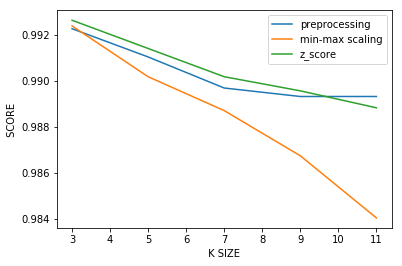

Preprocessing-Normalization için en iyi N değeri   :  3
Min max scaling için en iyi N değeri               :  3
Z_score için en iyi N değeri                       :  3

K-Nearest Neighbors, Preprocessed , N = 3 için, Train Data Score  : 0.9922632936264276
K-Nearest Neighbors, Preprocessed , N = 3 için, Test Data 1 Score : 0.9564727954971858
K-Nearest Neighbors, Preprocessed , N = 3 için, Test Data 2 Score : 0.9456521739130435

K-Nearest Neighbors, Min-Max Scaled , N = 3 için, Train Data Score  : 0.9923860984895002
K-Nearest Neighbors, Min-Max Scaled , N = 3 için, Test Data 1 Score : 0.9557223264540338
K-Nearest Neighbors, Min-Max Scaled , N = 3 için, Test Data 2 Score : 0.9634946677604594

K-Nearest Neighbors, Z-Score Scaled , N = 3 için, Train Data Score  : 0.9926317082156454
K-Nearest Neighbors, Z-Score Scaled , N = 3 için, Test Data 1 Score : 0.9403377110694184
K-Nearest Neighbors, Z-Score Scaled , N = 3 için, Test Data 2 Score : 0.9718006562756357

 FOR MIN MAX SCALING 
 -- -- -- -

In [295]:
#K-Nearest Neighbors Train

from sklearn.neighbors import KNeighborsClassifier

#en iyi komşu sayısı için

def findBestNeighbor():
    
    #görselleştirme için score lar tutuluyor
    accurancy_scores_pre = []
    accurancy_scores_normal = []
    accurancy_scores_zscore = []
    
    #array
    neigbour_array = []
    
    #karşılaştırma için en iyi score
    best_score_pre = 0
    best_score_normal = 0
    best_score_zscore = 0
    
    #en iyi N değeri kıyası
    best_for_prepo  = 0
    best_for_normal  = 0
    best_for_zscore = 0
    
    for each in np.arange(2,12):
        
        if each%2 == 1: #tek sayılar daha mantıklı
            
            #prepo için best score ve n değeri
            knn = KNeighborsClassifier(n_neighbors = each)
            knn.fit(x_train_preprocessing,y_train)
            accurancy = knn.score(x_train_preprocessing,y_train)
            accurancy_scores_pre.append(accurancy)
            if( accurancy > best_score_pre):
                best_score_pre = accurancy
                best_for_prepo = each
                
            #normalize için best score ve n değeri
            knn = KNeighborsClassifier(n_neighbors = each)
            knn.fit(x_train_normal,y_train)
            accurancy = knn.score(x_train_normal,y_train)
            accurancy_scores_normal.append(accurancy)
            
            if( accurancy > best_score_normal):
                best_score_normal = accurancy
                best_for_normal = each
                
            #zscore için best score ve n değeri
            knn = KNeighborsClassifier(n_neighbors = each)
            knn.fit(x_train_zscore,y_train)
            accurancy = knn.score(x_train_zscore,y_train)
            accurancy_scores_zscore.append(accurancy)
            
            if( accurancy > best_score_zscore):
                best_score_zscore = accurancy
                best_for_zscore = each
            
            #k değerleri
            neigbour_array.append(each)
                
    return best_for_prepo,best_for_normal,best_for_zscore,accurancy_scores_pre,accurancy_scores_normal,accurancy_scores_zscore,neigbour_array

    
best_for_prepo,best_for_normal,best_for_zscore,accurancy_scores_pre,accurancy_scores_normal,accurancy_scores_zscore,neigbour_array= findBestNeighbor() # best neighbor size for train dataset

#değerleri görselleştirmek

plt.plot(neigbour_array,accurancy_scores_pre,label="preprocessing")
plt.plot(neigbour_array,accurancy_scores_normal,label="min-max scaling")
plt.plot(neigbour_array,accurancy_scores_zscore,label="z_score")
plt.xlabel(" K SIZE ")
plt.ylabel(" SCORE ")
plt.legend()
plt.show()

            
print("Preprocessing-Normalization için en iyi N değeri   : ",best_for_prepo)
print("Min max scaling için en iyi N değeri               : ",best_for_normal)
print("Z_score için en iyi N değeri                       : ",best_for_zscore)

#TESTING

#preprocessing
KNN1 =  KNeighborsClassifier(best_for_prepo)
KNN1.fit(x_train_preprocessing,y_train)
#min-max scaled
KNN2 =  KNeighborsClassifier(best_for_normal)
KNN2.fit(x_train_normal,y_train)
#z-score
KNN3 =  KNeighborsClassifier(best_for_zscore)
KNN3.fit(x_train_zscore,y_train)

#Naive Bayes Test


#preprocessing
print("")
print("K-Nearest Neighbors, Preprocessed , N = {} için, Train Data Score  : {}".format(best_for_prepo,KNN1.score(x_train_preprocessing,y_train)))
print("K-Nearest Neighbors, Preprocessed , N = {} için, Test Data 1 Score : {}".format(best_for_prepo,KNN1.score(x_test_1_preprocessing,y_test_1)))
print("K-Nearest Neighbors, Preprocessed , N = {} için, Test Data 2 Score : {}".format(best_for_prepo,KNN1.score(x_test_2_preprocessing,y_test_2)))
print("")
#min-max scaled
print("K-Nearest Neighbors, Min-Max Scaled , N = {} için, Train Data Score  : {}".format(best_for_normal,KNN2.score(x_train_normal,y_train)))
print("K-Nearest Neighbors, Min-Max Scaled , N = {} için, Test Data 1 Score : {}".format(best_for_normal,KNN2.score(x_test_1_normal,y_test_1)))
print("K-Nearest Neighbors, Min-Max Scaled , N = {} için, Test Data 2 Score : {}".format(best_for_normal,KNN2.score(x_test_2_normal,y_test_2)))
print("")
#z-score
print("K-Nearest Neighbors, Z-Score Scaled , N = {} için, Train Data Score  : {}".format(best_for_zscore,KNN3.score(x_train_zscore,y_train)))
print("K-Nearest Neighbors, Z-Score Scaled , N = {} için, Test Data 1 Score : {}".format(best_for_zscore,KNN3.score(x_test_1_zscore,y_test_1)))
print("K-Nearest Neighbors, Z-Score Scaled , N = {} için, Test Data 2 Score : {}".format(best_for_zscore,KNN3.score(x_test_2_zscore,y_test_2)))
print("")

y_test1_pred = KNN2.predict(x_test_1_normal)
y_test2_pred = KNN2.predict(x_test_2_normal)

print(" FOR MIN MAX SCALING ")
print(" -- -- -- -- -- -- -- -- -- ")
print(" CONFUSION MATRIX FOR : ")
print(" Data test 1 ")
print(confusion_matrix(y_test_1, y_test1_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print(" Data test 2 ")
print(confusion_matrix(y_test_2, y_test2_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print("CLASSIFICATION REPORT : ")
print(classification_report(y_test_1, y_test1_pred))
print(classification_report(y_test_2, y_test2_pred))


In [296]:
#Decision Tree Training

from sklearn.tree import DecisionTreeClassifier

#preprocessing
DT1 = DecisionTreeClassifier(random_state=0)
DT1.fit(x_train_preprocessing,y_train)
#min-max scaled
DT2 = DecisionTreeClassifier(random_state=0)
DT2.fit(x_train_normal,y_train)
#z-score
DT3 = DecisionTreeClassifier(random_state=0)
DT3.fit(x_train_zscore,y_train)


#Decision Tree Test

#preprocessing
print("Decision Tree, Preprocessed , Train Data Score  : {}".format(DT1.score(x_train_preprocessing,y_train)))
print("Decision Tree, Preprocessed , Test Data 1 Score : {}".format(DT1.score(x_test_1_preprocessing,y_test_1)))
print("Decision Tree, Preprocessed , Test Data 2 Score : {}".format(DT1.score(x_test_2_preprocessing,y_test_2)))
print("")
#min-max scaled
print("Decision Tree, Min-Max Scaled , Train Data Score  : {}".format(DT2.score(x_train_normal,y_train)))
print("Decision Tree, Min-Max Scaled , Test Data 1 Score : {}".format(DT2.score(x_test_1_normal,y_test_1)))
print("Decision Tree, Min-Max Scaled , Test Data 2 Score : {}".format(DT2.score(x_test_2_normal,y_test_2)))
print("")
#z-score
print("Decision Tree, Z-Score Scaled , Train Data Score  : {}".format(DT3.score(x_train_zscore,y_train)))
print("Decision Tree, Z-Score Scaled , Test Data 1 Score : {}".format(DT3.score(x_test_1_zscore,y_test_1)))
print("Decision Tree, Z-Score Scaled , Test Data 2 Score : {}".format(DT3.score(x_test_2_zscore,y_test_2)))
print(" ")

y_test1_pred = DT2.predict(x_test_1_normal)
y_test2_pred = DT2.predict(x_test_2_normal)

print(" FOR MIN MAX SCALING ")
print(" -- -- -- -- -- -- -- -- -- ")
print(" CONFUSION MATRIX FOR : ")
print(" Data test 1 ")
print(confusion_matrix(y_test_1, y_test1_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print(" Data test 2 ")
print(confusion_matrix(y_test_2, y_test2_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print("CLASSIFICATION REPORT : ")
print(classification_report(y_test_1, y_test1_pred))
print(classification_report(y_test_2, y_test2_pred))

Decision Tree, Preprocessed , Train Data Score  : 1.0
Decision Tree, Preprocessed , Test Data 1 Score : 0.9065666041275797
Decision Tree, Preprocessed , Test Data 2 Score : 0.9280147662018048

Decision Tree, Min-Max Scaled , Train Data Score  : 1.0
Decision Tree, Min-Max Scaled , Test Data 1 Score : 0.973358348968105
Decision Tree, Min-Max Scaled , Test Data 2 Score : 0.9430885972108285

Decision Tree, Z-Score Scaled , Train Data Score  : 1.0
Decision Tree, Z-Score Scaled , Test Data 1 Score : 0.9587242026266416
Decision Tree, Z-Score Scaled , Test Data 2 Score : 0.9220672682526662
 
 FOR MIN MAX SCALING 
 -- -- -- -- -- -- -- -- -- 
 CONFUSION MATRIX FOR : 
 Data test 1 
[[1639   54]
 [  17  955]]
 -- -- -- -- -- -- -- -- -- 
 Data test 2 
[[7516  187]
 [ 368 1681]]
 -- -- -- -- -- -- -- -- -- 
CLASSIFICATION REPORT : 
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1693
          1       0.95      0.98      0.96       972

avg / t

 Preprocessing için en iyi estimator değeri :  41


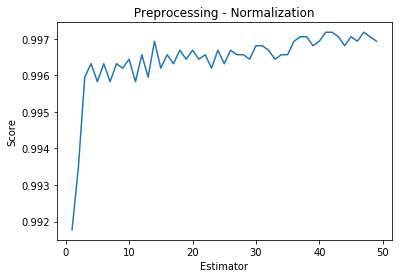

 Normalize(min-max scaling) için en iyi estimator değeri :  30


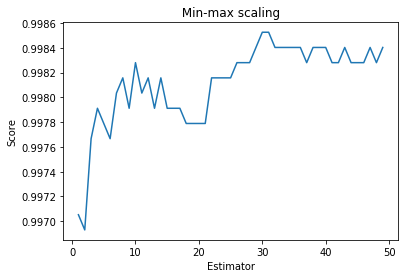

 Z-Score Scaling için en iyi estimator değeri :  30


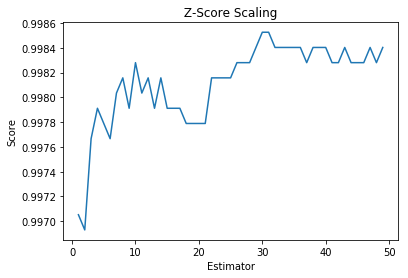

Random Forest, 41 Estimator Preprocessing Normalization , Train Data Score   : 0.9971754881493308
Random Forest, 41 Estimator Preprocessing Normalization , Test Data 1 Score  : 0.9684803001876172
Random Forest, 41 Estimator Preprocessing Normalization , Test Data 2 Score  : 0.9517022149302707

Random Forest, 30 Estimator Min-Max Scaled , Train Data Score                 : 0.998526341643129
Random Forest, 30 Estimator Min-Max Scaled , Test Data 1 Score                : 0.9711069418386492
Random Forest, 30 Estimator Min-Max Scaled , Test Data 2 Score                : 0.9854388843314192

Random Forest, 30 Estimator Z-Score Scaled , Train Data Score                 : 0.998526341643129
Random Forest, 30 Estimator Z-Score Scaled , Test Data 1 Score                : 0.9215759849906191
Random Forest, 30 Estimator Z-Score Scaled , Test Data 2 Score                : 0.9481132075471698
 
 FOR MIN MAX SCALING 
 -- -- -- -- -- -- -- -- -- 
 CONFUSION MATRIX FOR : 
 Data test 1 
[[1641   52]
 [  25 

In [297]:
#Random Forest Train

from sklearn.ensemble import RandomForestClassifier

def findBestforEstimator():
    
    estimators = []
    
    scores_pre = []
    scores_normal = []
    scores_zscore = []
    
    best_score_for_pre = 0
    best_score_for_normal = 0
    best_score_for_zscore = 0
    
    best_estimator_for_pre = 0
    best_estimator_for_normal = 0
    best_estimator_for_zscore = 0
    
    for each in np.arange(1,50):
        
        #preprocessing
        RF = RandomForestClassifier(each,random_state=0,max_leaf_nodes=50)
        RF.fit(x_train_preprocessing,y_train)
        accurancy = RF.score(x_train_preprocessing,y_train)
        scores_pre.append(accurancy)
        if(accurancy > best_score_for_pre):
            best_score_for_pre = accurancy
            best_estimator_for_pre = each
            
        #normal
        RF1 = RandomForestClassifier(each,random_state=0,max_leaf_nodes=50)
        RF1.fit(x_train_normal,y_train)
        accurancy1 = RF1.score(x_train_normal,y_train)
        scores_normal.append(accurancy1)
        if(accurancy1 > best_score_for_normal):
            best_score_for_normal = accurancy1
            best_estimator_for_normal = each
        
        #zscore
        RF2 = RandomForestClassifier(each,random_state=0,max_leaf_nodes=50)
        RF2.fit(x_train_zscore,y_train)
        accurancy2 = RF2.score(x_train_zscore,y_train)
        scores_zscore.append(accurancy2)
        if(accurancy2 > best_score_for_zscore):
            best_score_for_zscore = accurancy2
            best_estimator_for_zscore = each
        
        estimators.append(each)
        
    return best_estimator_for_pre,best_estimator_for_normal,best_estimator_for_zscore,scores_pre,scores_normal,scores_zscore,estimators


best_estimator_for_pre,best_estimator_for_normal,best_estimator_for_zscore,scores_pre,scores_normal,scores_zscore,estimators = findBestforEstimator()

#görselleştir
print(" Preprocessing için en iyi estimator değeri : ",best_estimator_for_pre)
plt.plot(estimators,scores_pre)
plt.xlabel("Estimator")
plt.ylabel("Score")
plt.title(" Preprocessing - Normalization ")
plt.show()

print(" Normalize(min-max scaling) için en iyi estimator değeri : ",best_estimator_for_normal)
plt.plot(estimators,scores_normal)
plt.xlabel("Estimator")
plt.ylabel("Score")
plt.title(" Min-max scaling ")
plt.show()

print(" Z-Score Scaling için en iyi estimator değeri : ",best_estimator_for_zscore)
plt.plot(estimators,scores_zscore)
plt.xlabel("Estimator")
plt.ylabel("Score")
plt.title(" Z-Score Scaling ")
plt.show()


# Train and Test

#preprocessing
RF1 = RandomForestClassifier(best_estimator_for_pre,random_state=0,max_leaf_nodes=50)
RF1.fit(x_train_preprocessing,y_train)
#min-max scaled
RF2 = RandomForestClassifier(best_estimator_for_normal,random_state=0,max_leaf_nodes=50)
RF2.fit(x_train_normal,y_train)
#z-score
RF3 = RandomForestClassifier(best_estimator_for_zscore,random_state=0,max_leaf_nodes=50)
RF3.fit(x_train_zscore,y_train)


#Decision Tree Test

#preprocessing
print("Random Forest, {} Estimator Preprocessing Normalization , Train Data Score   : {}".format(best_estimator_for_pre,RF1.score(x_train_preprocessing,y_train)))
print("Random Forest, {} Estimator Preprocessing Normalization , Test Data 1 Score  : {}".format(best_estimator_for_pre,RF1.score(x_test_1_preprocessing,y_test_1)))
print("Random Forest, {} Estimator Preprocessing Normalization , Test Data 2 Score  : {}".format(best_estimator_for_pre,RF1.score(x_test_2_preprocessing,y_test_2)))
print("")
#min-max scaled
print("Random Forest, {} Estimator Min-Max Scaled , Train Data Score                 : {}".format(best_estimator_for_normal,RF2.score(x_train_normal,y_train)))
print("Random Forest, {} Estimator Min-Max Scaled , Test Data 1 Score                : {}".format(best_estimator_for_normal,RF2.score(x_test_1_normal,y_test_1)))
print("Random Forest, {} Estimator Min-Max Scaled , Test Data 2 Score                : {}".format(best_estimator_for_normal,RF2.score(x_test_2_normal,y_test_2)))
print("")
#z-score
print("Random Forest, {} Estimator Z-Score Scaled , Train Data Score                 : {}".format(best_estimator_for_zscore,RF3.score(x_train_zscore,y_train)))
print("Random Forest, {} Estimator Z-Score Scaled , Test Data 1 Score                : {}".format(best_estimator_for_zscore,RF3.score(x_test_1_zscore,y_test_1)))
print("Random Forest, {} Estimator Z-Score Scaled , Test Data 2 Score                : {}".format(best_estimator_for_zscore,RF3.score(x_test_2_zscore,y_test_2)))

print(" ")

y_test1_pred = RF2.predict(x_test_1_normal)
y_test2_pred = RF2.predict(x_test_2_normal)

print(" FOR MIN MAX SCALING ")
print(" -- -- -- -- -- -- -- -- -- ")
print(" CONFUSION MATRIX FOR : ")
print(" Data test 1 ")
print(confusion_matrix(y_test_1, y_test1_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print(" Data test 2 ")
print(confusion_matrix(y_test_2, y_test2_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print("CLASSIFICATION REPORT : ")
print(classification_report(y_test_1, y_test1_pred))
print(classification_report(y_test_2, y_test2_pred))


In [298]:
#Gradient Boosting Machines Training

from sklearn.ensemble import GradientBoostingClassifier

#preprocessing
GBC1 = GradientBoostingClassifier(random_state=0)
GBC1.fit(x_train_preprocessing,y_train)
#min max scaling
GBC2 = GradientBoostingClassifier(random_state=0)
GBC2.fit(x_train_normal,y_train)
#zscore
GBC3 = GradientBoostingClassifier(random_state=0)
GBC3.fit(x_train_zscore,y_train)



#Gradient Boosting Machines Testing


print("Gradient Boosting Machines, Preprocessing Normalization için Train Data Score  : {}".format(GBC1.score(x_train_preprocessing,y_train)))
print("Gradient Boosting Machines, Preprocessing Normalization için Test Data 1 Score : {}".format(GBC1.score(x_test_1_preprocessing,y_test_1)))
print("Gradient Boosting Machines, Preprocessing Normalization için Test Data 2 Score : {}".format(GBC1.score(x_test_2_preprocessing,y_test_2)))
print(" ")
print("Gradient Boosting Machines, Min-Max Scaled için Train Data Score               : {}".format(GBC2.score(x_train_normal,y_train)))
print("Gradient Boosting Machines, Min-Max Scaled için Test Data 1 Score              : {}".format(GBC2.score(x_test_1_normal,y_test_1)))
print("Gradient Boosting Machines, Min-Max Scaled için Test Data 2 Score              : {}".format(GBC2.score(x_test_2_normal,y_test_2)))
print(" ")
print("Gradient Boosting Machines, Z-Score Scaled için Train Data Score               : {}".format(GBC3.score(x_train_zscore,y_train)))
print("Gradient Boosting Machines, Z-Score Scaled için Test Data 1 Score              : {}".format(GBC3.score(x_test_1_zscore,y_test_1)))
print("Gradient Boosting Machines, Z-Score Scaled için Test Data 2 Score              : {}".format(GBC3.score(x_test_2_zscore,y_test_2)))


print(" ")



Gradient Boosting Machines, Preprocessing Normalization için Train Data Score  : 0.9928773179417905
Gradient Boosting Machines, Preprocessing Normalization için Test Data 1 Score : 0.9632270168855535
Gradient Boosting Machines, Preprocessing Normalization için Test Data 2 Score : 0.9543683347005743
 
Gradient Boosting Machines, Min-Max Scaled için Train Data Score               : 0.998280731916984
Gradient Boosting Machines, Min-Max Scaled için Test Data 1 Score              : 0.974108818011257
Gradient Boosting Machines, Min-Max Scaled için Test Data 2 Score              : 0.9636997538966365
 
Gradient Boosting Machines, Z-Score Scaled için Train Data Score               : 0.998280731916984
Gradient Boosting Machines, Z-Score Scaled için Test Data 1 Score              : 0.9140712945590994
Gradient Boosting Machines, Z-Score Scaled için Test Data 2 Score              : 0.9425758818703855
 


## Kernelized Support Vector Training

#### Aktivasyon Kodlarına Göre Değişimler

### Kernel = polynomial fit & score

Kernelized Support Vector, Kernel Poly , Preprocessing Normalization için Train Data Score  : 0.9174751320152278
Kernelized Support Vector, Kernel Poly , Preprocessing Normalization için Test Data 1 Score : 0.9789868667917448
Kernelized Support Vector, Kernel Poly , Preprocessing Normalization için Test Data 2 Score : 0.9495488105004102
 
Kernelized Support Vector, Kernel Poly , Min-Max Scaled için Train Data Score               : 0.9398256170944369
Kernelized Support Vector, Kernel Poly , Min-Max Scaled için Test Data 1 Score              : 0.9084427767354597
Kernelized Support Vector, Kernel Poly , Min-Max Scaled için Test Data 2 Score              : 0.918785890073831
 
Kernelized Support Vector, Kernel Poly , Z-Score Scaled için Train Data Score               : 0.9842809775267101
Kernelized Support Vector, Kernel Poly , Z-Score Scaled için Test Data 1 Score              : 0.9181988742964353
Kernelized Support Vector, Kernel Poly , Z-Score Scaled için Test Data 2 Score              :

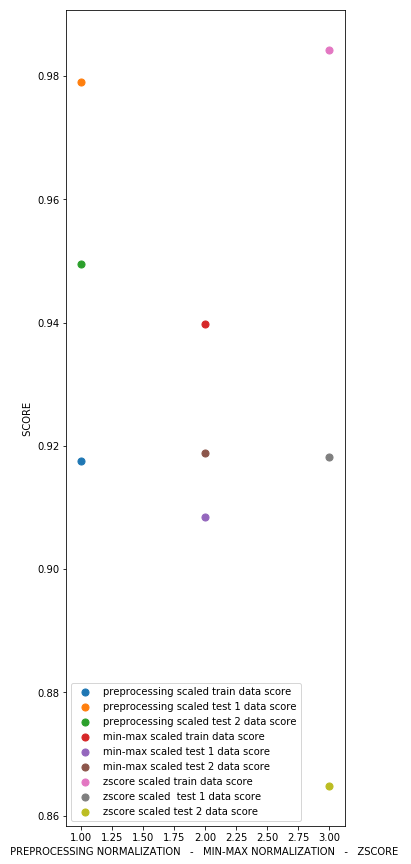

 
 FOR MIN MAX SCALING 
 -- -- -- -- -- -- -- -- -- 
 CONFUSION MATRIX FOR : 
 Data test 1 
[[1643   50]
 [ 194  778]]
 -- -- -- -- -- -- -- -- -- 
 Data test 2 
[[7671   32]
 [ 760 1289]]
 -- -- -- -- -- -- -- -- -- 
CLASSIFICATION REPORT : 
             precision    recall  f1-score   support

          0       0.89      0.97      0.93      1693
          1       0.94      0.80      0.86       972

avg / total       0.91      0.91      0.91      2665

             precision    recall  f1-score   support

          0       0.91      1.00      0.95      7703
          1       0.98      0.63      0.76      2049

avg / total       0.92      0.92      0.91      9752



In [299]:
from sklearn.svm import SVC

svc1 = SVC(random_state=0,kernel="poly")
svc1.fit(x_train_preprocessing,y_train)

svc2 = SVC(random_state=0,kernel="poly")
svc2.fit(x_train_normal,y_train)

svc3 = SVC(random_state=0,kernel="poly")
svc3.fit(x_train_zscore,y_train)

## train poly sigmoid felan için görselleştirme


print("Kernelized Support Vector, Kernel Poly , Preprocessing Normalization için Train Data Score  : {}".format(svc1.score(x_train_preprocessing,y_train)))
print("Kernelized Support Vector, Kernel Poly , Preprocessing Normalization için Test Data 1 Score : {}".format(svc1.score(x_test_1_preprocessing,y_test_1)))
print("Kernelized Support Vector, Kernel Poly , Preprocessing Normalization için Test Data 2 Score : {}".format(svc1.score(x_test_2_preprocessing,y_test_2)))
print(" ")
print("Kernelized Support Vector, Kernel Poly , Min-Max Scaled için Train Data Score               : {}".format(svc2.score(x_train_normal,y_train)))
print("Kernelized Support Vector, Kernel Poly , Min-Max Scaled için Test Data 1 Score              : {}".format(svc2.score(x_test_1_normal,y_test_1)))
print("Kernelized Support Vector, Kernel Poly , Min-Max Scaled için Test Data 2 Score              : {}".format(svc2.score(x_test_2_normal,y_test_2)))
print(" ")
print("Kernelized Support Vector, Kernel Poly , Z-Score Scaled için Train Data Score               : {}".format(svc3.score(x_train_zscore,y_train)))
print("Kernelized Support Vector, Kernel Poly , Z-Score Scaled için Test Data 1 Score              : {}".format(svc3.score(x_test_1_zscore,y_test_1)))
print("Kernelized Support Vector, Kernel Poly , Z-Score Scaled için Test Data 2 Score              : {}".format(svc3.score(x_test_2_zscore,y_test_2)))


plt.figure(figsize=(5,15))

plt.scatter(1,svc1.score(x_train_preprocessing,y_train),label="preprocessing scaled train data score",s=50)
plt.scatter(1,svc1.score(x_test_1_preprocessing,y_test_1),label="preprocessing scaled test 1 data score",s=50)
plt.scatter(1,svc1.score(x_test_2_preprocessing,y_test_2),label="preprocessing scaled test 2 data score",s=50)

plt.scatter(2,svc2.score(x_train_normal,y_train),label="min-max scaled train data score",s=50)
plt.scatter(2,svc2.score(x_test_1_normal,y_test_1),label="min-max scaled test 1 data score",s=50)
plt.scatter(2,svc2.score(x_test_2_normal,y_test_2),label="min-max scaled test 2 data score",s=50)
            
plt.scatter(3,svc3.score(x_train_zscore,y_train),label="zscore scaled train data score",s=50)
plt.scatter(3,svc3.score(x_test_1_zscore,y_test_1),label="zscore scaled  test 1 data score",s=50)
plt.scatter(3,svc3.score(x_test_2_zscore,y_test_2),label="zscore scaled test 2 data score",s=50)

plt.xlabel(" PREPROCESSING NORMALIZATION   -   MIN-MAX NORMALIZATION   -   ZSCORE  ")
plt.ylabel(" SCORE ")
plt.legend()
plt.show()

print(" ")

y_test1_pred = svc2.predict(x_test_1_normal)
y_test2_pred = svc2.predict(x_test_2_normal)

print(" FOR MIN MAX SCALING ")
print(" -- -- -- -- -- -- -- -- -- ")
print(" CONFUSION MATRIX FOR : ")
print(" Data test 1 ")
print(confusion_matrix(y_test_1, y_test1_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print(" Data test 2 ")
print(confusion_matrix(y_test_2, y_test2_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print("CLASSIFICATION REPORT : ")
print(classification_report(y_test_1, y_test1_pred))
print(classification_report(y_test_2, y_test2_pred))

### Kernel = Gaussian fit  & score

Kernelized Support Vector, Kernel Gaussian , Preprocessing Normalization için Train Data Score  : 0.9365098857914773
Kernelized Support Vector, Kernel Gaussian , Preprocessing Normalization için Test Data 1 Score : 0.9767354596622889
Kernelized Support Vector, Kernel Gaussian , Preprocessing Normalization için Test Data 2 Score : 0.947805578342904
 
Kernelized Support Vector, Kernel Gaussian , Min-Max Scaled için Train Data Score               : 0.9879651234188874
Kernelized Support Vector, Kernel Gaussian , Min-Max Scaled için Test Data 1 Score              : 0.9767354596622889
Kernelized Support Vector, Kernel Gaussian , Min-Max Scaled için Test Data 2 Score              : 0.9874897456931911
 
Kernelized Support Vector, Kernel Gaussian , Z-Score Scaled için Train Data Score               : 0.9888247574603954
Kernelized Support Vector, Kernel Gaussian , Z-Score Scaled için Test Data 1 Score              : 0.9575984990619137
Kernelized Support Vector, Kernel Gaussian , Z-Score Scaled i

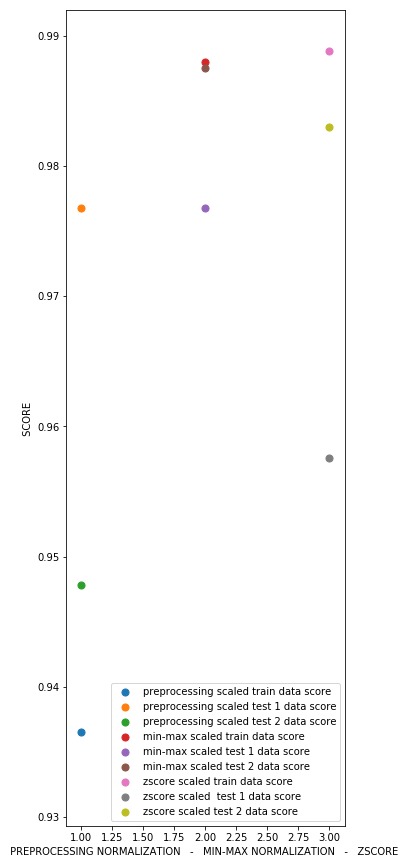

 
 FOR MIN MAX SCALING 
 -- -- -- -- -- -- -- -- -- 
 CONFUSION MATRIX FOR : 
 Data test 1 
[[1632   61]
 [   1  971]]
 -- -- -- -- -- -- -- -- -- 
 Data test 2 
[[7594  109]
 [  13 2036]]
 -- -- -- -- -- -- -- -- -- 
CLASSIFICATION REPORT : 
             precision    recall  f1-score   support

          0       1.00      0.96      0.98      1693
          1       0.94      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7703
          1       0.95      0.99      0.97      2049

avg / total       0.99      0.99      0.99      9752



In [300]:
svc4 = SVC(random_state=0,kernel="rbf")
svc4.fit(x_train_preprocessing,y_train)

svc5 = SVC(random_state=0,kernel="rbf")
svc5.fit(x_train_normal,y_train)

svc6 = SVC(random_state=0,kernel="rbf")
svc6.fit(x_train_zscore,y_train)


print("Kernelized Support Vector, Kernel Gaussian , Preprocessing Normalization için Train Data Score  : {}".format(svc4.score(x_train_preprocessing,y_train)))
print("Kernelized Support Vector, Kernel Gaussian , Preprocessing Normalization için Test Data 1 Score : {}".format(svc4.score(x_test_1_preprocessing,y_test_1)))
print("Kernelized Support Vector, Kernel Gaussian , Preprocessing Normalization için Test Data 2 Score : {}".format(svc4.score(x_test_2_preprocessing,y_test_2)))
print(" ")
print("Kernelized Support Vector, Kernel Gaussian , Min-Max Scaled için Train Data Score               : {}".format(svc5.score(x_train_normal,y_train)))
print("Kernelized Support Vector, Kernel Gaussian , Min-Max Scaled için Test Data 1 Score              : {}".format(svc5.score(x_test_1_normal,y_test_1)))
print("Kernelized Support Vector, Kernel Gaussian , Min-Max Scaled için Test Data 2 Score              : {}".format(svc5.score(x_test_2_normal,y_test_2)))
print(" ")
print("Kernelized Support Vector, Kernel Gaussian , Z-Score Scaled için Train Data Score               : {}".format(svc6.score(x_train_zscore,y_train)))
print("Kernelized Support Vector, Kernel Gaussian , Z-Score Scaled için Test Data 1 Score              : {}".format(svc6.score(x_test_1_zscore,y_test_1)))
print("Kernelized Support Vector, Kernel Gaussian , Z-Score Scaled için Test Data 2 Score              : {}".format(svc6.score(x_test_2_zscore,y_test_2)))

plt.figure(figsize=(5,15))

plt.scatter(1,svc4.score(x_train_preprocessing,y_train),label="preprocessing scaled train data score",s=50)
plt.scatter(1,svc4.score(x_test_1_preprocessing,y_test_1),label="preprocessing scaled test 1 data score",s=50)
plt.scatter(1,svc4.score(x_test_2_preprocessing,y_test_2),label="preprocessing scaled test 2 data score",s=50)

plt.scatter(2,svc5.score(x_train_normal,y_train),label="min-max scaled train data score",s=50)
plt.scatter(2,svc5.score(x_test_1_normal,y_test_1),label="min-max scaled test 1 data score",s=50)
plt.scatter(2,svc5.score(x_test_2_normal,y_test_2),label="min-max scaled test 2 data score",s=50)
            
plt.scatter(3,svc6.score(x_train_zscore,y_train),label="zscore scaled train data score",s=50)
plt.scatter(3,svc6.score(x_test_1_zscore,y_test_1),label="zscore scaled  test 1 data score",s=50)
plt.scatter(3,svc6.score(x_test_2_zscore,y_test_2),label="zscore scaled test 2 data score",s=50)

plt.xlabel(" PREPROCESSING NORMALIZATION   -   MIN-MAX NORMALIZATION   -   ZSCORE  ")
plt.ylabel(" SCORE ")
plt.legend()
plt.show()

print(" ")

y_test1_pred = svc5.predict(x_test_1_normal)
y_test2_pred = svc5.predict(x_test_2_normal)

print(" FOR MIN MAX SCALING ")
print(" -- -- -- -- -- -- -- -- -- ")
print(" CONFUSION MATRIX FOR : ")
print(" Data test 1 ")
print(confusion_matrix(y_test_1, y_test1_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print(" Data test 2 ")
print(confusion_matrix(y_test_2, y_test2_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print("CLASSIFICATION REPORT : ")
print(classification_report(y_test_1, y_test1_pred))
print(classification_report(y_test_2, y_test2_pred))


### Kernel = Sigmoid fit  & score

Kernelized Support Vector, Kernel Sigmoid , Preprocessing Normalization için Train Data Score  : 0.9331941544885177
Kernelized Support Vector, Kernel Sigmoid , Preprocessing Normalization için Test Data 1 Score : 0.9789868667917448
Kernelized Support Vector, Kernel Sigmoid , Preprocessing Normalization için Test Data 2 Score : 0.9514971287940935
 
Kernelized Support Vector, Kernel Sigmoid , Min-Max Scaled için Train Data Score               : 0.9879651234188874
Kernelized Support Vector, Kernel Sigmoid , Min-Max Scaled için Test Data 1 Score              : 0.9782363977485928
Kernelized Support Vector, Kernel Sigmoid , Min-Max Scaled için Test Data 2 Score              : 0.9892329778506973
 
Kernelized Support Vector, Kernel Sigmoid , Z-Score Scaled için Train Data Score               : 0.9382291538744935
Kernelized Support Vector, Kernel Sigmoid , Z-Score Scaled için Test Data 1 Score              : 0.8461538461538461
Kernelized Support Vector, Kernel Sigmoid , Z-Score Scaled için Test

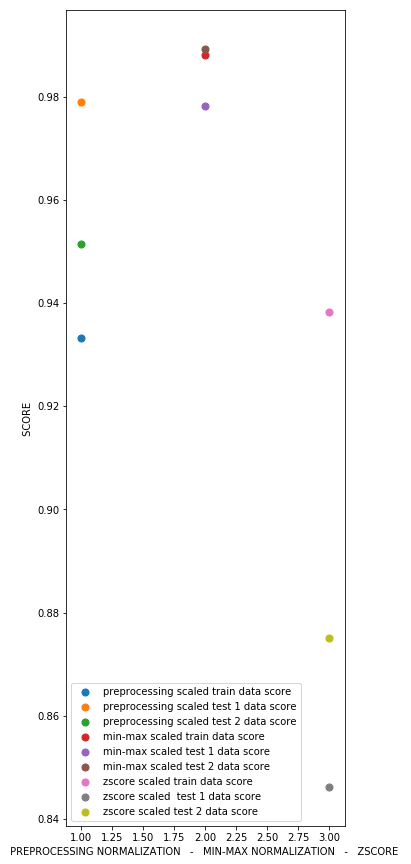

 
 FOR MIN MAX SCALING 
 -- -- -- -- -- -- -- -- -- 
 CONFUSION MATRIX FOR : 
 Data test 1 
[[1636   57]
 [   1  971]]
 -- -- -- -- -- -- -- -- -- 
 Data test 2 
[[7606   97]
 [   8 2041]]
 -- -- -- -- -- -- -- -- -- 
CLASSIFICATION REPORT : 
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.94      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7703
          1       0.95      1.00      0.97      2049

avg / total       0.99      0.99      0.99      9752



In [301]:
svc7 = SVC(random_state=0,kernel="sigmoid")
svc7.fit(x_train_preprocessing,y_train)

svc8 = SVC(random_state=0,kernel="sigmoid")
svc8.fit(x_train_normal,y_train)

svc9 = SVC(random_state=0,kernel="sigmoid")
svc9.fit(x_train_zscore,y_train)


print("Kernelized Support Vector, Kernel Sigmoid , Preprocessing Normalization için Train Data Score  : {}".format(svc7.score(x_train_preprocessing,y_train)))
print("Kernelized Support Vector, Kernel Sigmoid , Preprocessing Normalization için Test Data 1 Score : {}".format(svc7.score(x_test_1_preprocessing,y_test_1)))
print("Kernelized Support Vector, Kernel Sigmoid , Preprocessing Normalization için Test Data 2 Score : {}".format(svc7.score(x_test_2_preprocessing,y_test_2)))
print(" ")
print("Kernelized Support Vector, Kernel Sigmoid , Min-Max Scaled için Train Data Score               : {}".format(svc8.score(x_train_normal,y_train)))
print("Kernelized Support Vector, Kernel Sigmoid , Min-Max Scaled için Test Data 1 Score              : {}".format(svc8.score(x_test_1_normal,y_test_1)))
print("Kernelized Support Vector, Kernel Sigmoid , Min-Max Scaled için Test Data 2 Score              : {}".format(svc8.score(x_test_2_normal,y_test_2)))
print(" ")
print("Kernelized Support Vector, Kernel Sigmoid , Z-Score Scaled için Train Data Score               : {}".format(svc9.score(x_train_zscore,y_train)))
print("Kernelized Support Vector, Kernel Sigmoid , Z-Score Scaled için Test Data 1 Score              : {}".format(svc9.score(x_test_1_zscore,y_test_1)))
print("Kernelized Support Vector, Kernel Sigmoid , Z-Score Scaled için Test Data 2 Score              : {}".format(svc9.score(x_test_2_zscore,y_test_2)))

plt.figure(figsize=(5,15))

plt.scatter(1,svc7.score(x_train_preprocessing,y_train),label="preprocessing scaled train data score",s=50)
plt.scatter(1,svc7.score(x_test_1_preprocessing,y_test_1),label="preprocessing scaled test 1 data score",s=50)
plt.scatter(1,svc7.score(x_test_2_preprocessing,y_test_2),label="preprocessing scaled test 2 data score",s=50)

plt.scatter(2,svc8.score(x_train_normal,y_train),label="min-max scaled train data score",s=50)
plt.scatter(2,svc8.score(x_test_1_normal,y_test_1),label="min-max scaled test 1 data score",s=50)
plt.scatter(2,svc8.score(x_test_2_normal,y_test_2),label="min-max scaled test 2 data score",s=50)
            
plt.scatter(3,svc9.score(x_train_zscore,y_train),label="zscore scaled train data score",s=50)
plt.scatter(3,svc9.score(x_test_1_zscore,y_test_1),label="zscore scaled  test 1 data score",s=50)
plt.scatter(3,svc9.score(x_test_2_zscore,y_test_2),label="zscore scaled test 2 data score",s=50)

plt.xlabel(" PREPROCESSING NORMALIZATION   -   MIN-MAX NORMALIZATION   -   ZSCORE  ")
plt.ylabel(" SCORE ")
plt.legend()
plt.show()

print(" ")

y_test1_pred = svc8.predict(x_test_1_normal)
y_test2_pred = svc8.predict(x_test_2_normal)

print(" FOR MIN MAX SCALING ")
print(" -- -- -- -- -- -- -- -- -- ")
print(" CONFUSION MATRIX FOR : ")
print(" Data test 1 ")
print(confusion_matrix(y_test_1, y_test1_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print(" Data test 2 ")
print(confusion_matrix(y_test_2, y_test2_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print("CLASSIFICATION REPORT : ")
print(classification_report(y_test_1, y_test1_pred))
print(classification_report(y_test_2, y_test2_pred))


In [302]:
from sklearn.linear_model import SGDClassifier

SGD_pre = SGDClassifier(loss="modified_huber", penalty="l1", max_iter=5,random_state=0)
SGD_pre.fit(x_train_preprocessing,y_train)

SGD_normal = SGDClassifier(loss="modified_huber", penalty="l1", max_iter=5,random_state=0)
SGD_normal.fit(x_train_normal,y_train)

SGD_zscore = SGDClassifier(loss="modified_huber", penalty="l1", max_iter=5,random_state=0)
SGD_zscore.fit(x_train_zscore,y_train)

print("Stochastic Gradient Descent, Preprocessing Normalization için Train Data Score  : ",SGD_pre.score(x_train_preprocessing,y_train))
print("Stochastic Gradient Descent, Preprocessing Normalization için Test Data 1 Score : ",SGD_pre.score(x_test_1_preprocessing,y_test_1))
print("Stochastic Gradient Descent, Preprocessing Normalization için Test Data 2 Score : ",SGD_pre.score(x_test_2_preprocessing,y_test_2))
print(" ")
print("Stochastic Gradient Descent, Min Max Normalization için Train Data Score        : ",SGD_normal.score(x_train_normal,y_train))
print("Stochastic Gradient Descent, Min Max Normalization için Test Data 1 Score       : ",SGD_normal.score(x_test_1_normal,y_test_1))
print("Stochastic Gradient Descent, Min Max Normalization için Test Data 2 Score       : ",SGD_normal.score(x_test_2_normal,y_test_2))
print(" ")
print("Stochastic Gradient Descent, ZScore Scaling için Train Data Score               : ",SGD_zscore.score(x_train_zscore,y_train))
print("Stochastic Gradient Descent, ZScore Scaling için Test Data 1 Score              : ",SGD_zscore.score(x_test_1_zscore,y_test_1))
print("Stochastic Gradient Descent, ZScore Scaling için Test Data 2 Score              : ",SGD_zscore.score(x_test_2_zscore,y_test_2))


print(" ")

y_test1_pred = SGD_normal.predict(x_test_1_normal)
y_test2_pred = SGD_normal.predict(x_test_2_normal)

print(" FOR MIN MAX SCALING ")
print(" -- -- -- -- -- -- -- -- -- ")
print(" CONFUSION MATRIX FOR : ")
print(" Data test 1 ")
print(confusion_matrix(y_test_1, y_test1_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print(" Data test 2 ")
print(confusion_matrix(y_test_2, y_test2_pred))
print(" -- -- -- -- -- -- -- -- -- ")
print("CLASSIFICATION REPORT : ")
print(classification_report(y_test_1, y_test1_pred))
print(classification_report(y_test_2, y_test2_pred))


Stochastic Gradient Descent, Preprocessing Normalization için Train Data Score  :  0.9810880510868231
Stochastic Gradient Descent, Preprocessing Normalization için Test Data 1 Score :  0.9677298311444653
Stochastic Gradient Descent, Preprocessing Normalization için Test Data 2 Score :  0.9308859721082855
 
Stochastic Gradient Descent, Min Max Normalization için Train Data Score        :  0.9832985386221295
Stochastic Gradient Descent, Min Max Normalization için Test Data 1 Score       :  0.9789868667917448
Stochastic Gradient Descent, Min Max Normalization için Test Data 2 Score       :  0.9705701394585726
 
Stochastic Gradient Descent, ZScore Scaling için Train Data Score               :  0.9824389045806214
Stochastic Gradient Descent, ZScore Scaling için Test Data 1 Score              :  0.8450281425891182
Stochastic Gradient Descent, ZScore Scaling için Test Data 2 Score              :  0.9549835931091059
 
 FOR MIN MAX SCALING 
 -- -- -- -- -- -- -- -- -- 
 CONFUSION MATRIX FOR : 


## SONUÇ